

# Project: Investigate a Dataset - [Gapminder World]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset I will be investigating is provided by Gapminder World, it is records across years showing how people live in the different countries in terms of population, life expectancy, economy, education and so on. For this  project I have selected four indicators the mean number years of men and women in school from ages fifteen to twenty four,employment rate from ages 15 to 24 and literacy rate in youth's from ages fifteen to twenty four. The employment table shows the percentage of total population, age group 15-24, that has been employedduring the given year with columns from 1991 to 2019. The tables of both the mean number of years in school of men and women (MYSM and MYSW respectively) shows the average number of years of school attented by all people in the age and gender group specified, including primary, secondary and tertiary with columns from 1970 to 2015.The literacy rate table shows the percentage of people ages 15-24 who can with understanding, read, and write a short, simple statement on their everday life with columns from  1975 to 2011.


### Question(s) for Analysis
I have no particular set question for analysis, I want to explore the relationship between the indicators I have chosen and see if there are any clear predictions to be made from these relationships.



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style ('darkgrid')
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
MYSM_df=pd.read_csv ('mean_years_in_school_men_15_to_24_years.csv', header=0)
MYSM_df.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,...,4.33,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27
1,Angola,2.25,2.31,2.36,2.42,2.48,2.54,2.60,2.67,2.73,...,5.10,5.21,5.32,5.43,5.55,5.66,5.78,5.90,6.02,6.14
2,Albania,5.47,5.58,5.69,5.80,5.91,6.02,6.13,6.24,6.36,...,9.89,10.00,10.20,10.30,10.40,10.60,10.70,10.90,11.00,11.20
3,Andorra,9.16,9.30,9.44,9.58,9.72,9.86,10.00,10.10,10.30,...,13.90,14.10,14.20,14.30,14.40,14.50,14.60,14.70,14.80,14.90
4,United Arab Emirates,4.24,4.35,4.47,4.58,4.71,4.83,4.96,5.09,5.23,...,10.60,10.70,10.90,11.10,11.20,11.40,11.50,11.70,11.80,12.00


In [3]:
MYSW_df=pd.read_csv ('mean_years_in_school_women_15_to_24_years.csv',header=0)
MYSW_df.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.48,0.50,0.51,0.53,0.55,0.57,0.59,0.61,0.63,...,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13
1,Angola,1.64,1.69,1.74,1.80,1.85,1.91,1.97,2.03,2.10,...,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00
2,Albania,4.99,5.11,5.24,5.36,5.49,5.62,5.75,5.88,6.02,...,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70
3,Andorra,9.50,9.67,9.84,10.00,10.20,10.30,10.50,10.70,10.80,...,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10
4,United Arab Emirates,4.18,4.31,4.45,4.58,4.72,4.87,5.02,5.18,5.34,...,11.40,11.60,11.80,12.00,12.20,12.30,12.50,12.70,12.80,13.00


In [4]:
literacyrate_df=pd.read_csv ('literacy_rate_youth_total_percent_of_people_ages_15_24.csv',header=0)
literacyrate_df.head ()

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.1,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,30.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0
3,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.8,NaN,NaN,98.8


In [5]:
employment_df=pd.read_csv ('aged_15_24_employment_rate_percent.csv',header=0)
employment_df.head ()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,33.0,33.0,33.0,32.9,32.7,32.7,32.7,32.7,32.7,...,32.4,32.5,32.6,32.6,32.7,32.8,32.9,33.0,33.2,33.3
1,Angola,52.6,52.8,53.0,53.0,53.0,53.1,53.0,52.8,52.5,...,46.0,47.7,47.7,47.7,47.7,47.6,47.6,47.5,47.3,47.0
2,Albania,48.9,49.5,47.9,46.6,44.7,43.4,45.0,43.6,41.4,...,22.5,34.3,26.8,20.6,17.8,19.5,21.6,23.1,25.5,26.8
3,United Arab Emirates,45.0,46.1,46.7,46.4,45.5,45.0,45.0,45.0,45.1,...,52.1,51.9,51.3,50.2,49.2,48.4,48.1,48.1,49.6,49.6
4,Argentina,41.4,39.9,35.9,33.9,27.7,29.0,31.0,32.8,31.6,...,32.8,33.1,32.9,32.0,31.1,30.8,30.2,29.6,29.6,28.5


I noticed that the tables had no column headers so for each I set the header parameter to 0 to provide uniformity across the tables.

In [6]:
MYSM_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 47 columns):
country    188 non-null object
1970       188 non-null float64
1971       188 non-null float64
1972       188 non-null float64
1973       188 non-null float64
1974       188 non-null float64
1975       188 non-null float64
1976       188 non-null float64
1977       188 non-null float64
1978       188 non-null float64
1979       188 non-null float64
1980       188 non-null float64
1981       188 non-null float64
1982       188 non-null float64
1983       188 non-null float64
1984       188 non-null float64
1985       188 non-null float64
1986       188 non-null float64
1987       188 non-null float64
1988       188 non-null float64
1989       188 non-null float64
1990       188 non-null float64
1991       188 non-null float64
1992       188 non-null float64
1993       188 non-null float64
1994       188 non-null float64
1995       188 non-null float64
1996       188 non-null float64


In [7]:
MYSW_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 47 columns):
country    188 non-null object
1970       188 non-null float64
1971       188 non-null float64
1972       188 non-null float64
1973       188 non-null float64
1974       188 non-null float64
1975       188 non-null float64
1976       188 non-null float64
1977       188 non-null float64
1978       188 non-null float64
1979       188 non-null float64
1980       188 non-null float64
1981       188 non-null float64
1982       188 non-null float64
1983       188 non-null float64
1984       188 non-null float64
1985       188 non-null float64
1986       188 non-null float64
1987       188 non-null float64
1988       188 non-null float64
1989       188 non-null float64
1990       188 non-null float64
1991       188 non-null float64
1992       188 non-null float64
1993       188 non-null float64
1994       188 non-null float64
1995       188 non-null float64
1996       188 non-null float64


In [8]:
literacyrate_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 38 columns):
country    155 non-null object
1975       6 non-null float64
1976       7 non-null float64
1977       1 non-null float64
1978       2 non-null float64
1979       7 non-null float64
1980       18 non-null float64
1981       18 non-null float64
1982       7 non-null float64
1983       2 non-null float64
1984       5 non-null float64
1985       6 non-null float64
1986       4 non-null float64
1987       3 non-null float64
1988       4 non-null float64
1989       10 non-null float64
1990       16 non-null float64
1991       22 non-null float64
1992       10 non-null float64
1993       4 non-null float64
1994       12 non-null float64
1995       5 non-null float64
1996       8 non-null float64
1997       3 non-null float64
1998       5 non-null float64
1999       7 non-null float64
2000       43 non-null float64
2001       28 non-null float64
2002       18 non-null float64
2003       9 n

In [9]:
employment_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
country    189 non-null object
1991       189 non-null float64
1992       189 non-null float64
1993       189 non-null float64
1994       189 non-null float64
1995       189 non-null float64
1996       189 non-null float64
1997       189 non-null float64
1998       189 non-null float64
1999       189 non-null float64
2000       189 non-null float64
2001       189 non-null float64
2002       189 non-null float64
2003       189 non-null float64
2004       189 non-null float64
2005       189 non-null float64
2006       189 non-null float64
2007       189 non-null float64
2008       189 non-null float64
2009       189 non-null float64
2010       189 non-null float64
2011       189 non-null float64
2012       189 non-null float64
2013       189 non-null float64
2014       189 non-null float64
2015       189 non-null float64
2016       189 non-null float64
2017       189 non-null float64


On examining the info on each table, I noticed that more than half of the literacyrate table values where null and after reading through an article by Satyam Kumar on Deep Dive Analysis of missing values in a dataset,I assume this is because it's Missing Not At Random (MNAR) due to unobserved data. In order to continue with analysis I have decided to use the column with the most values which is 2011.



In [10]:
observation_df=MYSM_df.join(MYSW_df['2011'], lsuffix='_MYSM', rsuffix='_MYSW')
observation_df

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011_MYSM,2012,2013,2014,2015,2011_MYSW
0,Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,...,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27,1.88
1,Angola,2.25,2.31,2.36,2.42,2.48,2.54,2.60,2.67,2.73,...,5.21,5.32,5.43,5.55,5.66,5.78,5.90,6.02,6.14,5.43
2,Albania,5.47,5.58,5.69,5.80,5.91,6.02,6.13,6.24,6.36,...,10.00,10.20,10.30,10.40,10.60,10.70,10.90,11.00,11.20,11.00
3,Andorra,9.16,9.30,9.44,9.58,9.72,9.86,10.00,10.10,10.30,...,14.10,14.20,14.30,14.40,14.50,14.60,14.70,14.80,14.90,15.60
4,United Arab Emirates,4.24,4.35,4.47,4.58,4.71,4.83,4.96,5.09,5.23,...,10.70,10.90,11.10,11.20,11.40,11.50,11.70,11.80,12.00,12.30
5,Argentina,6.61,6.73,6.84,6.96,7.07,7.19,7.31,7.42,7.54,...,10.70,10.80,11.00,11.10,11.20,11.40,11.50,11.60,11.70,12.20
6,Armenia,6.10,6.22,6.34,6.45,6.57,6.69,6.81,6.93,7.04,...,10.50,10.70,10.80,10.90,11.10,11.20,11.30,11.50,11.60,11.60
7,Antigua and Barbuda,7.46,7.59,7.72,7.86,7.99,8.12,8.26,8.40,8.53,...,12.50,12.60,12.80,12.90,13.00,13.10,13.30,13.40,13.50,14.50
8,Australia,9.06,9.20,9.34,9.48,9.62,9.76,9.90,10.00,10.20,...,13.80,13.90,14.00,14.10,14.20,14.30,14.40,14.60,14.70,14.60
9,Austria,7.24,7.35,7.46,7.57,7.68,7.79,7.89,8.00,8.10,...,10.90,11.00,11.20,11.30,11.40,11.50,11.70,11.80,11.90,11.80


In [11]:
observation_df.drop (observation_df.loc [:,'1970':'2010',], axis=1,inplace=True)
observation_df.head ()

,country,2011_MYSM,2012,2013,2014,2015,2011_MYSW
0,Afghanistan,4.84,4.94,5.05,5.16,5.27,1.88
1,Angola,5.66,5.78,5.90,6.02,6.14,5.43
2,Albania,10.60,10.70,10.90,11.00,11.20,11.00
3,Andorra,14.50,14.60,14.70,14.80,14.90,15.60
4,United Arab Emirates,11.40,11.50,11.70,11.80,12.00,12.30


In [12]:
observation_df.drop (observation_df.loc [:,'2012':'2015',], axis=1,inplace=True)
observation_df.head ()

,country,2011_MYSM,2011_MYSW
0,Afghanistan,4.84,1.88
1,Angola,5.66,5.43
2,Albania,10.60,11.00
3,Andorra,14.50,15.60
4,United Arab Emirates,11.40,12.30


In [14]:
#I noticed that without returning this particular block of cold twice the column of 2011
observation_df=observation_df.join(literacyrate_df['2011'], rsuffix='_literacyrate')
observation_df

,country,2011_MYSM,2011_MYSW,2011,2011_literacyrate
0,Afghanistan,4.84,1.88,NaN,NaN
1,Angola,5.66,5.43,NaN,NaN
2,Albania,10.60,11.00,73.0,73.0
3,Andorra,14.50,15.60,NaN,NaN
4,United Arab Emirates,11.40,12.30,98.8,98.8
5,Argentina,11.20,12.20,98.5,98.5
6,Armenia,11.10,11.60,NaN,NaN
7,Antigua and Barbuda,13.00,14.50,99.2,99.2
8,Australia,14.20,14.60,99.8,99.8
9,Austria,11.40,11.80,NaN,NaN


In [15]:
observation_df.drop('2011', axis=1,inplace=True)
observation_df.head ()

,country,2011_MYSM,2011_MYSW,2011_literacyrate
0,Afghanistan,4.84,1.88,NaN
1,Angola,5.66,5.43,NaN
2,Albania,10.60,11.00,73.0
3,Andorra,14.50,15.60,NaN
4,United Arab Emirates,11.40,12.30,98.8


In [17]:
observation_df=observation_df.join(employment_df['2011'], rsuffix='_employment')
observation_df

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011,2011_employment
0,Afghanistan,4.84,1.88,NaN,32.5,32.5
1,Angola,5.66,5.43,NaN,47.7,47.7
2,Albania,10.60,11.00,73.0,34.3,34.3
3,Andorra,14.50,15.60,NaN,51.9,51.9
4,United Arab Emirates,11.40,12.30,98.8,33.1,33.1
5,Argentina,11.20,12.20,98.5,23.8,23.8
6,Armenia,11.10,11.60,NaN,60.4,60.4
7,Antigua and Barbuda,13.00,14.50,99.2,53.9,53.9
8,Australia,14.20,14.60,99.8,28.2,28.2
9,Austria,11.40,11.80,NaN,55.6,55.6


In [18]:
observation_df.drop('2011', axis=1,inplace=True)
observation_df.head ()

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
0,Afghanistan,4.84,1.88,NaN,32.5
1,Angola,5.66,5.43,NaN,47.7
2,Albania,10.60,11.00,73.0,34.3
3,Andorra,14.50,15.60,NaN,51.9
4,United Arab Emirates,11.40,12.30,98.8,33.1


Using df.join() and df.drop(), I was able to select the 2011 column for all the indicators into one dataframe. 


### Data Cleaning
 

In [19]:
observation_df = observation_df.dropna()
observation_df

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
2,Albania,10.60,11.00,73.0,34.3
4,United Arab Emirates,11.40,12.30,98.8,33.1
5,Argentina,11.20,12.20,98.5,23.8
7,Antigua and Barbuda,13.00,14.50,99.2,53.9
8,Australia,14.20,14.60,99.8,28.2
13,Benin,6.05,3.87,78.7,39.4
14,Burkina Faso,3.42,2.42,97.9,22.0
16,Bulgaria,11.00,11.20,99.7,39.1
21,Belize,9.29,9.78,99.8,48.3
23,Brazil,7.68,8.95,95.2,34.3


Dropping all rows with null values because they are not of use for further analysis.

In [20]:
observation_df.reset_index(drop=True, inplace=True)
observation_df

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
0,Albania,10.60,11.00,73.0,34.3
1,United Arab Emirates,11.40,12.30,98.8,33.1
2,Argentina,11.20,12.20,98.5,23.8
3,Antigua and Barbuda,13.00,14.50,99.2,53.9
4,Australia,14.20,14.60,99.8,28.2
5,Benin,6.05,3.87,78.7,39.4
6,Burkina Faso,3.42,2.42,97.9,22.0
7,Bulgaria,11.00,11.20,99.7,39.1
8,Belize,9.29,9.78,99.8,48.3
9,Brazil,7.68,8.95,95.2,34.3


Resetting index after dropping null values.

In [21]:
observation_df.describe()

,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
count,81.000000,81.000000,81.000000,81.000000
mean,9.801605,9.857531,92.179012,37.990123
std,2.647682,3.351899,12.197487,15.036253
min,3.420000,2.220000,46.900000,11.800000
25%,8.010000,7.610000,88.400000,26.200000
50%,10.600000,10.900000,98.300000,36.300000
75%,11.900000,12.400000,99.700000,47.600000
max,14.300000,14.900000,100.000000,78.200000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the distribution of the average number of years of both men and women like?

In [22]:
mean_MYSM=np.mean (observation_df['2011_MYSM'])
np.mean(observation_df['2011_MYSM'])

9.8016049382716037

<function matplotlib.pyplot.show(*args, **kw)>

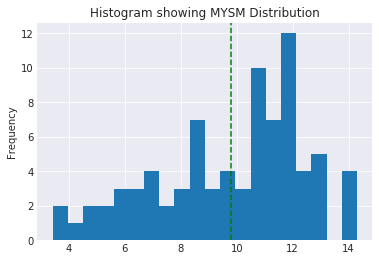

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#observation_df.plot(x=MYSM_df['2011'], y=MYSW_df['2011'])
#plt.show()
MYSM = observation_df['2011_MYSM']
MYSM.plot (kind='hist',bins=20)
plt.title ('Histogram showing MYSM Distribution')
plt.axvline(mean_MYSM,color='green', linestyle='--')
plt.show

In [24]:
observation_df['2011_MYSM'].skew (axis=0)

-0.56957352673833228

In [25]:
import statistics 
mode_MYSM=statistics.mode (observation_df ['2011_MYSM'])
mode_MYSM
#observation_df ['2011_MYSM'].mode()

10.6

In [26]:
median_MYSM=np.median (observation_df ['2011_MYSM'])
median_MYSM

10.6

Determining if the distribution is skewed to the left or right by calculating the mean,median and mode. The mean is less than than the median and also the tail is on the left side meaning it is highly skewed to the left.

In [27]:
mean_MYSW=np.mean (observation_df['2011_MYSW'])
np.mean(observation_df['2011_MYSW'])

9.8575308641975301

<function matplotlib.pyplot.show(*args, **kw)>

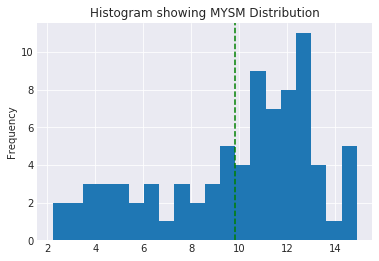

In [28]:
MYSW = observation_df['2011_MYSW']
MYSW.plot (kind='hist', bins=20)
plt.title('Histogram showing MYSM Distribution')
plt.axvline(mean_MYSM,color='green', linestyle='--')
plt.show

In [29]:
observation_df['2011_MYSW'].skew (axis=0)

-0.71872619791600323

In [30]:
median_MYSW=np.median (observation_df ['2011_MYSW'])
median_MYSW

10.9

In [31]:
observation_df ['2011_MYSW'].mode()

0    11.0
1    11.2
2    12.4
3    12.7
dtype: float64

To determine if the distribution is skewed to the left or right, I calculated the mean,median and mode. The mean is less than than the median which is less than the mode and also the tail is on the left side meaning it is highly skewed to the left.


### Research Question 2:Do the countries with higher average years in schoolfor both men and women have higher employment and literacy rates?

In [32]:
check_MYSM=observation_df.loc[observation_df['2011_MYSM']>mean_MYSM]
check_MYSM

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
0,Albania,10.6,11.00,73.0,34.3
1,United Arab Emirates,11.4,12.30,98.8,33.1
2,Argentina,11.2,12.20,98.5,23.8
3,Antigua and Barbuda,13.0,14.50,99.2,53.9
4,Australia,14.2,14.60,99.8,28.2
7,Bulgaria,11.0,11.20,99.7,39.1
10,Barbados,10.6,12.00,65.6,35.2
12,Switzerland,10.9,11.20,98.2,31.8
13,Chile,12.2,12.90,86.0,49.5
14,China,10.6,10.60,98.4,34.2


Text(0,0.5,'Frequency')

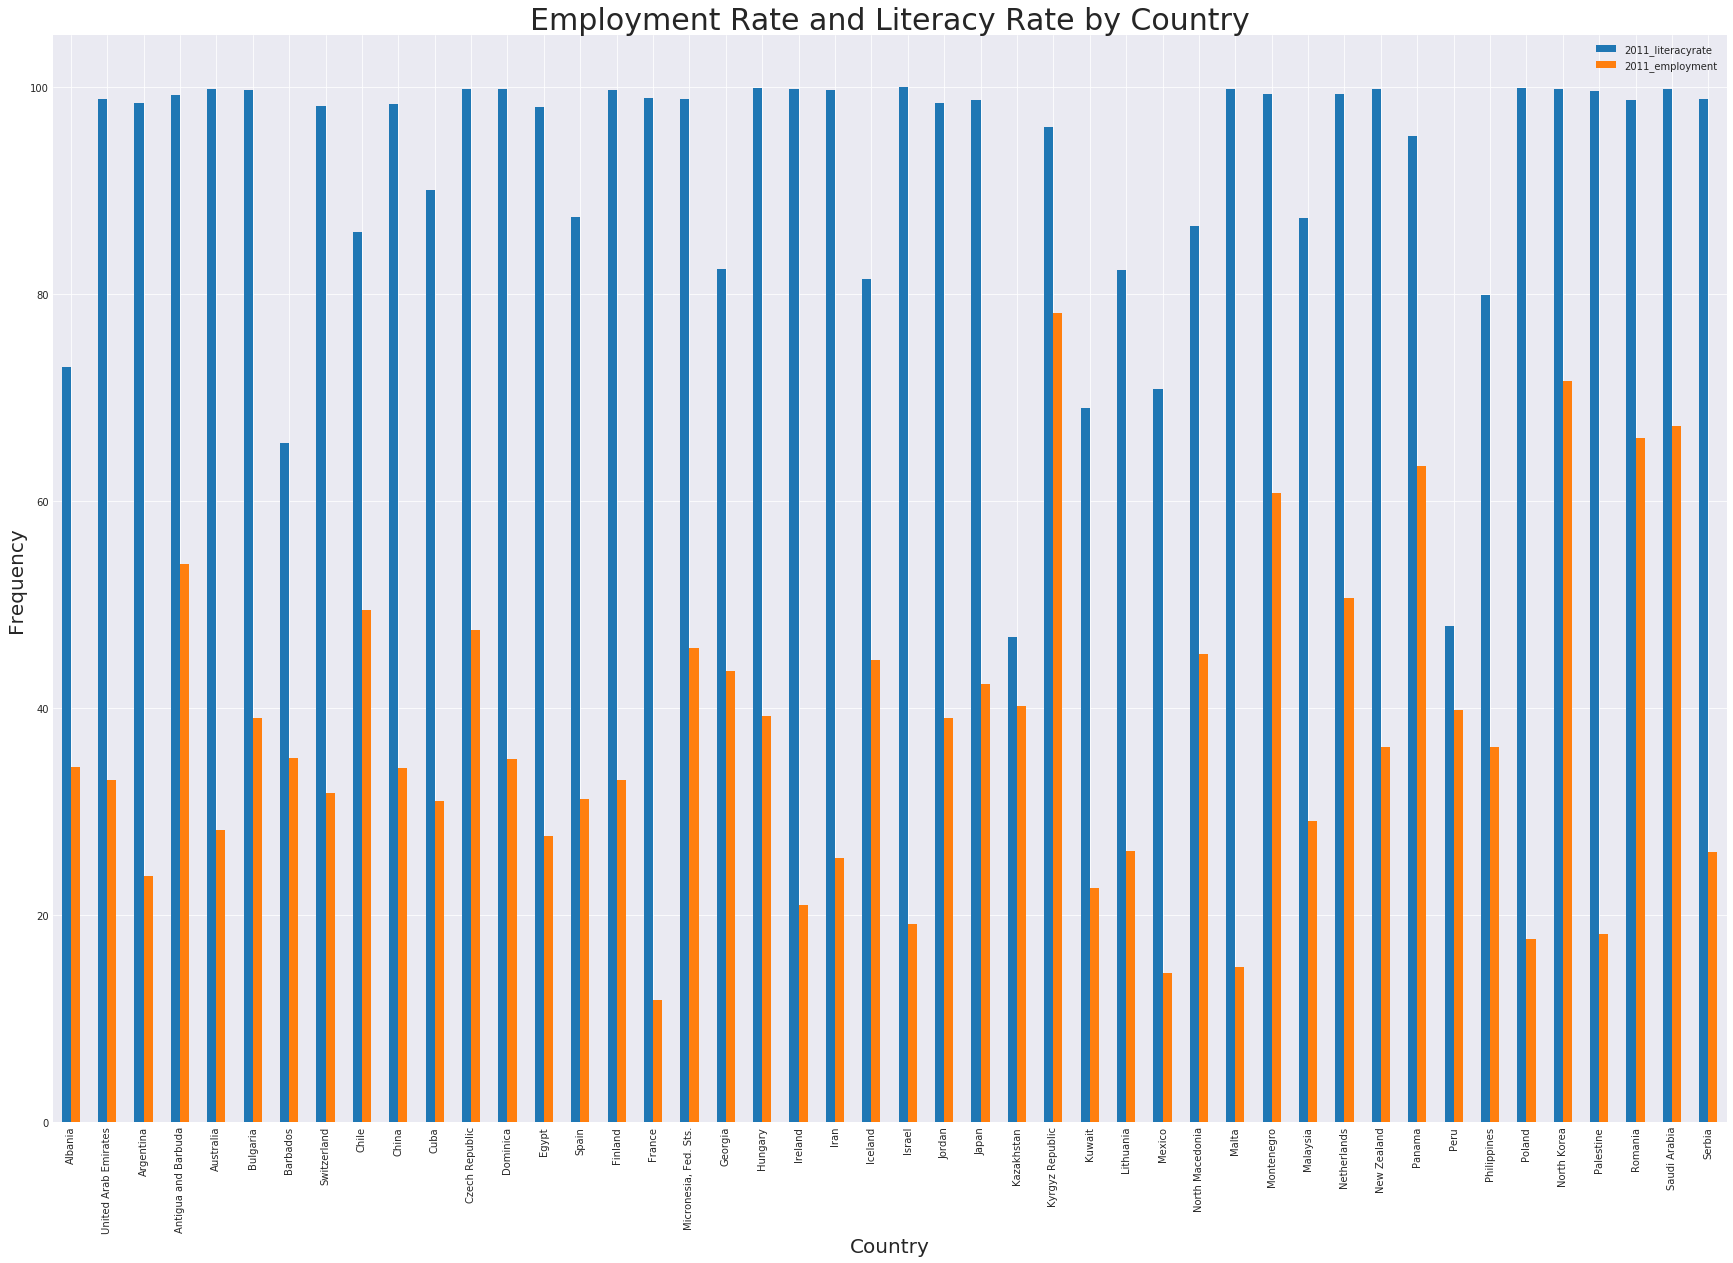

In [34]:
check_MYSM.plot (x='country', y=['2011_literacyrate','2011_employment'],kind='bar')
plt.title ('Employment Rate and Literacy Rate by Country',fontsize=30)
plt.rcParams["figure.figsize"] = (30,20)
plt.xlabel ('Country', fontsize=20)
plt.ylabel ('Frequency',fontsize=20)

Selecting countries that have average years in school for men (MYSM) higher than the mean into a new dataframe and plotting.

In [35]:
check_MYSM2=observation_df.loc[observation_df['2011_MYSM']<mean_MYSM]
check_MYSM2

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
5,Benin,6.05,3.87,78.7,39.4
6,Burkina Faso,3.42,2.42,97.9,22.0
8,Belize,9.29,9.78,99.8,48.3
9,Brazil,7.68,8.95,95.2,34.3
11,Botswana,7.84,9.78,67.5,55.4
15,Cote d'Ivoire,6.11,4.29,98.3,53.6
16,Cameroon,8.16,7.37,100.0,34.3
17,"Congo, Rep.",8.44,8.05,99.8,43.5
18,Colombia,9.54,10.50,97.0,13.6
19,Cape Verde,7.61,7.81,98.7,33.8


Text(0,0.5,'Frequency')

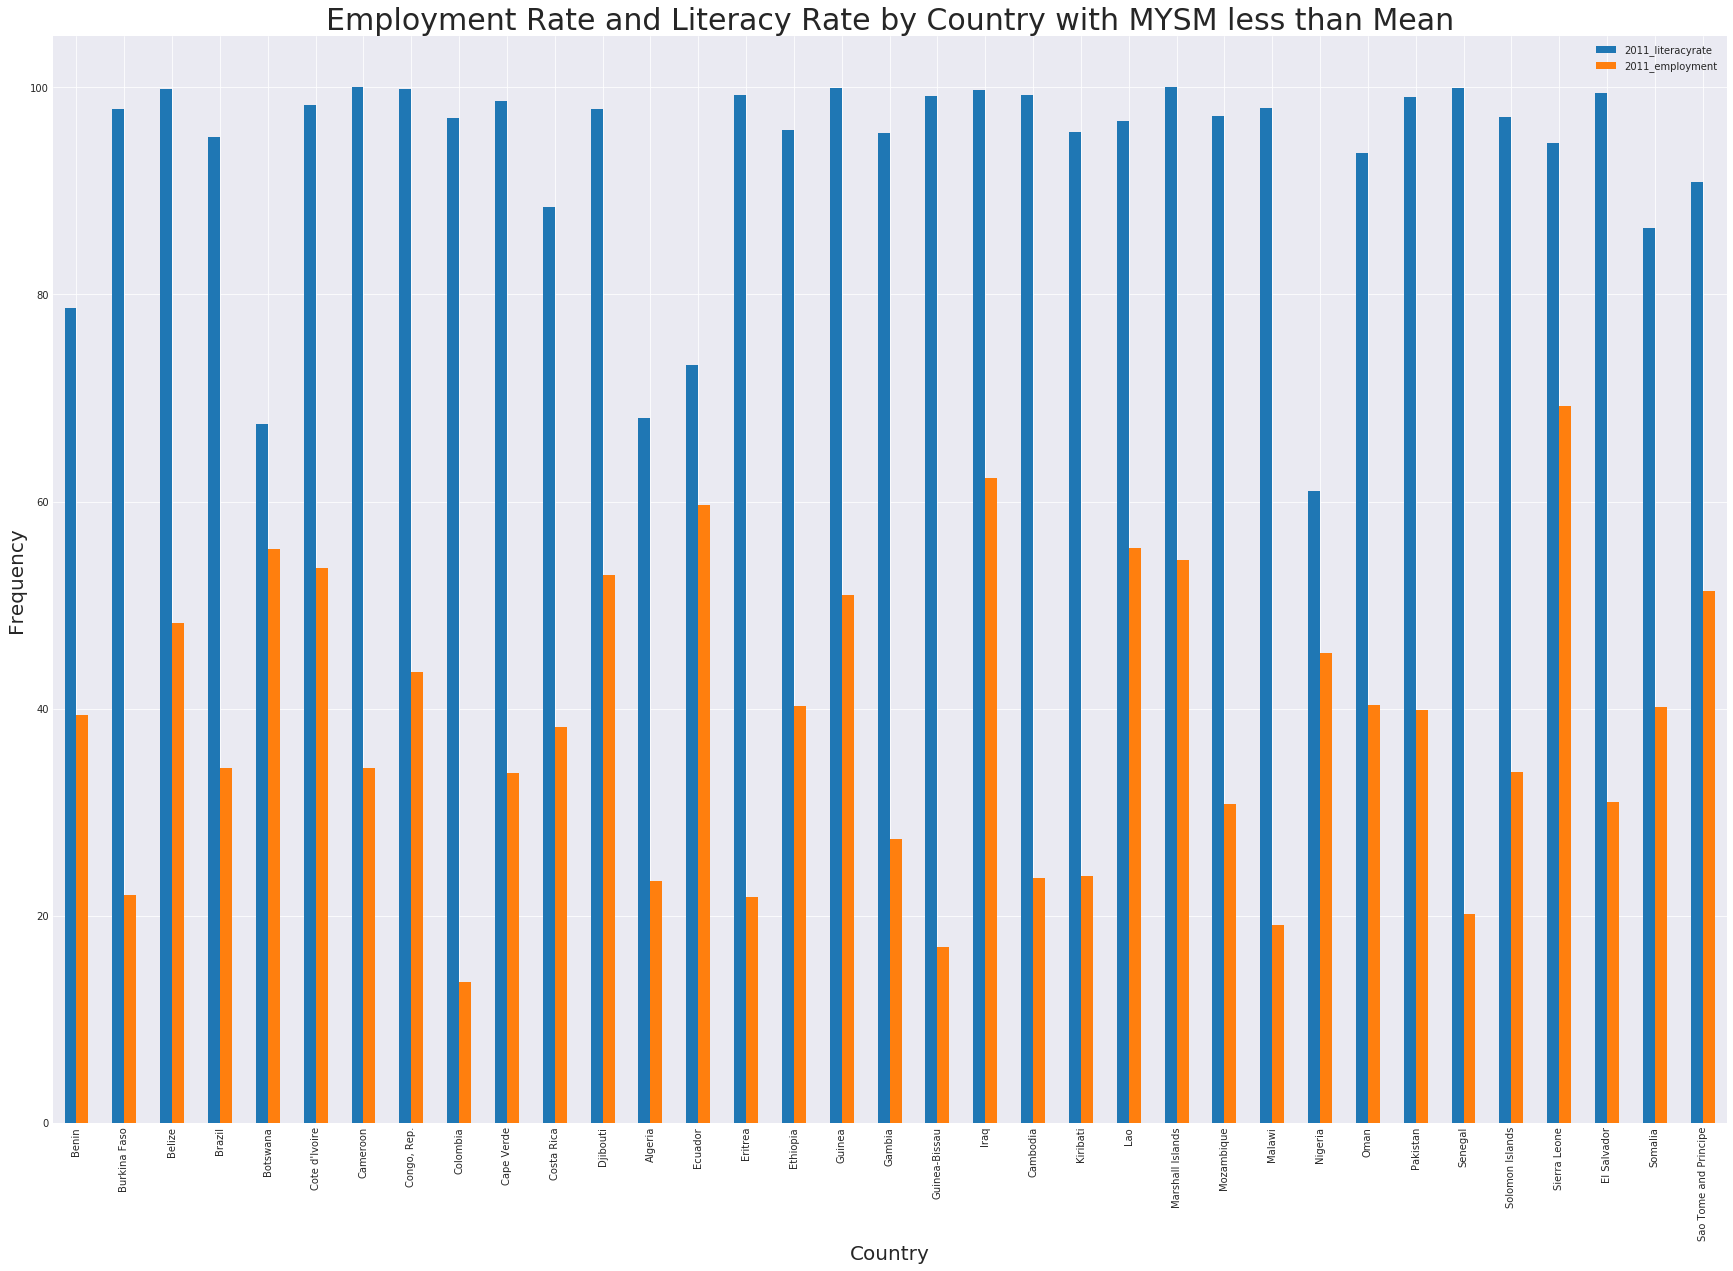

In [36]:
check_MYSM2.plot (x='country', y=['2011_literacyrate','2011_employment'],kind='bar')
plt.title ('Employment Rate and Literacy Rate by Country with MYSM less than Mean',fontsize =30)
plt.xlabel ('Country', fontsize=20)
plt.ylabel ('Frequency',fontsize=20)

Selecting countries that have average years in school for men (MYSM) less than the mean into a new dataframe and plotting.

In [37]:
check_MYSW=observation_df.loc[observation_df['2011_MYSW']>mean_MYSW]
check_MYSW

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
0,Albania,10.60,11.0,73.0,34.3
1,United Arab Emirates,11.40,12.3,98.8,33.1
2,Argentina,11.20,12.2,98.5,23.8
3,Antigua and Barbuda,13.00,14.5,99.2,53.9
4,Australia,14.20,14.6,99.8,28.2
7,Bulgaria,11.00,11.2,99.7,39.1
10,Barbados,10.60,12.0,65.6,35.2
12,Switzerland,10.90,11.2,98.2,31.8
13,Chile,12.20,12.9,86.0,49.5
14,China,10.60,10.6,98.4,34.2


Text(0,0.5,'Frequency')

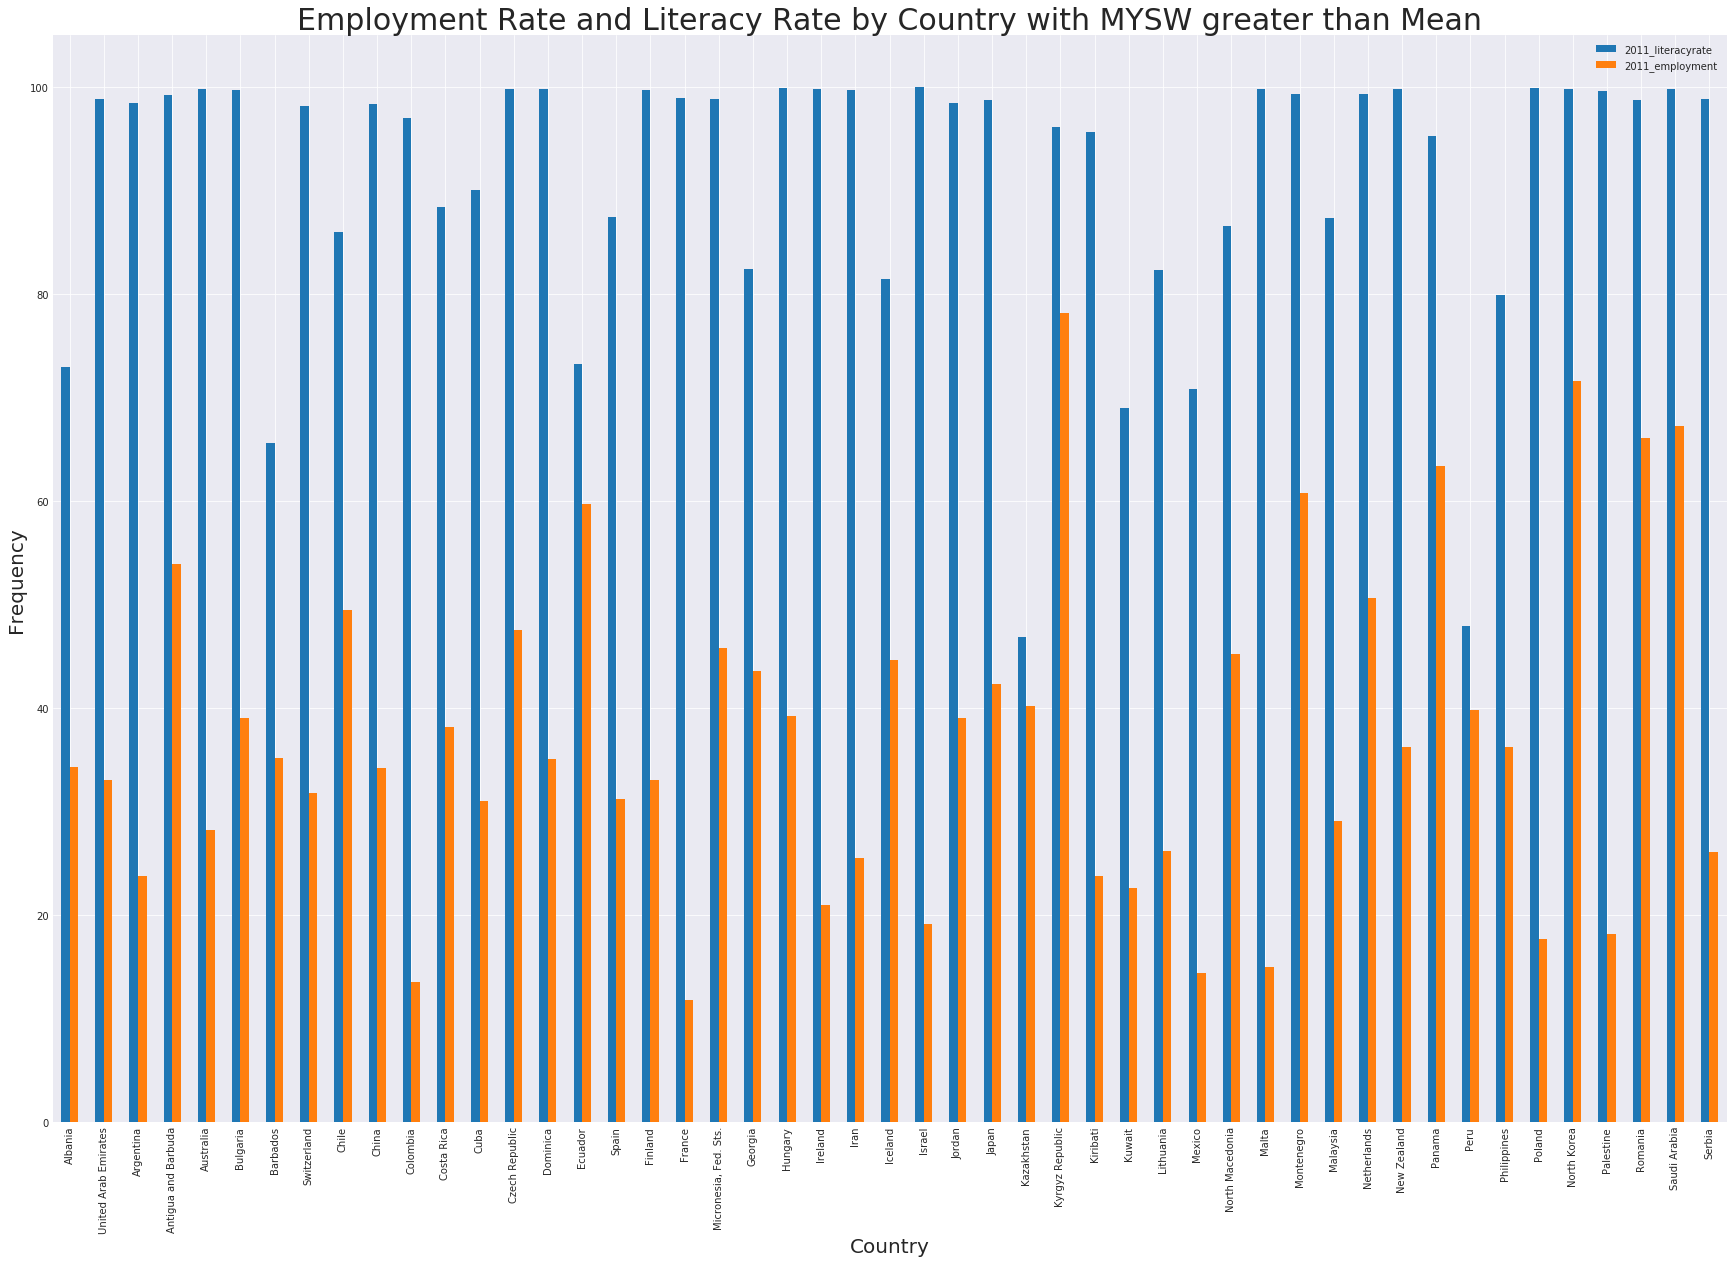

In [38]:
check_MYSW.plot (x='country', y=['2011_literacyrate','2011_employment'],kind='bar')
plt.title ('Employment Rate and Literacy Rate by Country with MYSW greater than Mean',fontsize=30)
plt.xlabel ('Country', fontsize=20)
plt.ylabel ('Frequency',fontsize=20)

Selecting countries that have average years in school for women (MYSW) higher than the mean into a new dataframe and plotting.

In [39]:
check_MYSW2=observation_df.loc[observation_df['2011_MYSW']<mean_MYSW]
check_MYSW2

,country,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
5,Benin,6.05,3.87,78.7,39.4
6,Burkina Faso,3.42,2.42,97.9,22.0
8,Belize,9.29,9.78,99.8,48.3
9,Brazil,7.68,8.95,95.2,34.3
11,Botswana,7.84,9.78,67.5,55.4
15,Cote d'Ivoire,6.11,4.29,98.3,53.6
16,Cameroon,8.16,7.37,100.0,34.3
17,"Congo, Rep.",8.44,8.05,99.8,43.5
19,Cape Verde,7.61,7.81,98.7,33.8
23,Djibouti,8.63,5.43,97.9,52.9


Text(0,0.5,'Frequency')

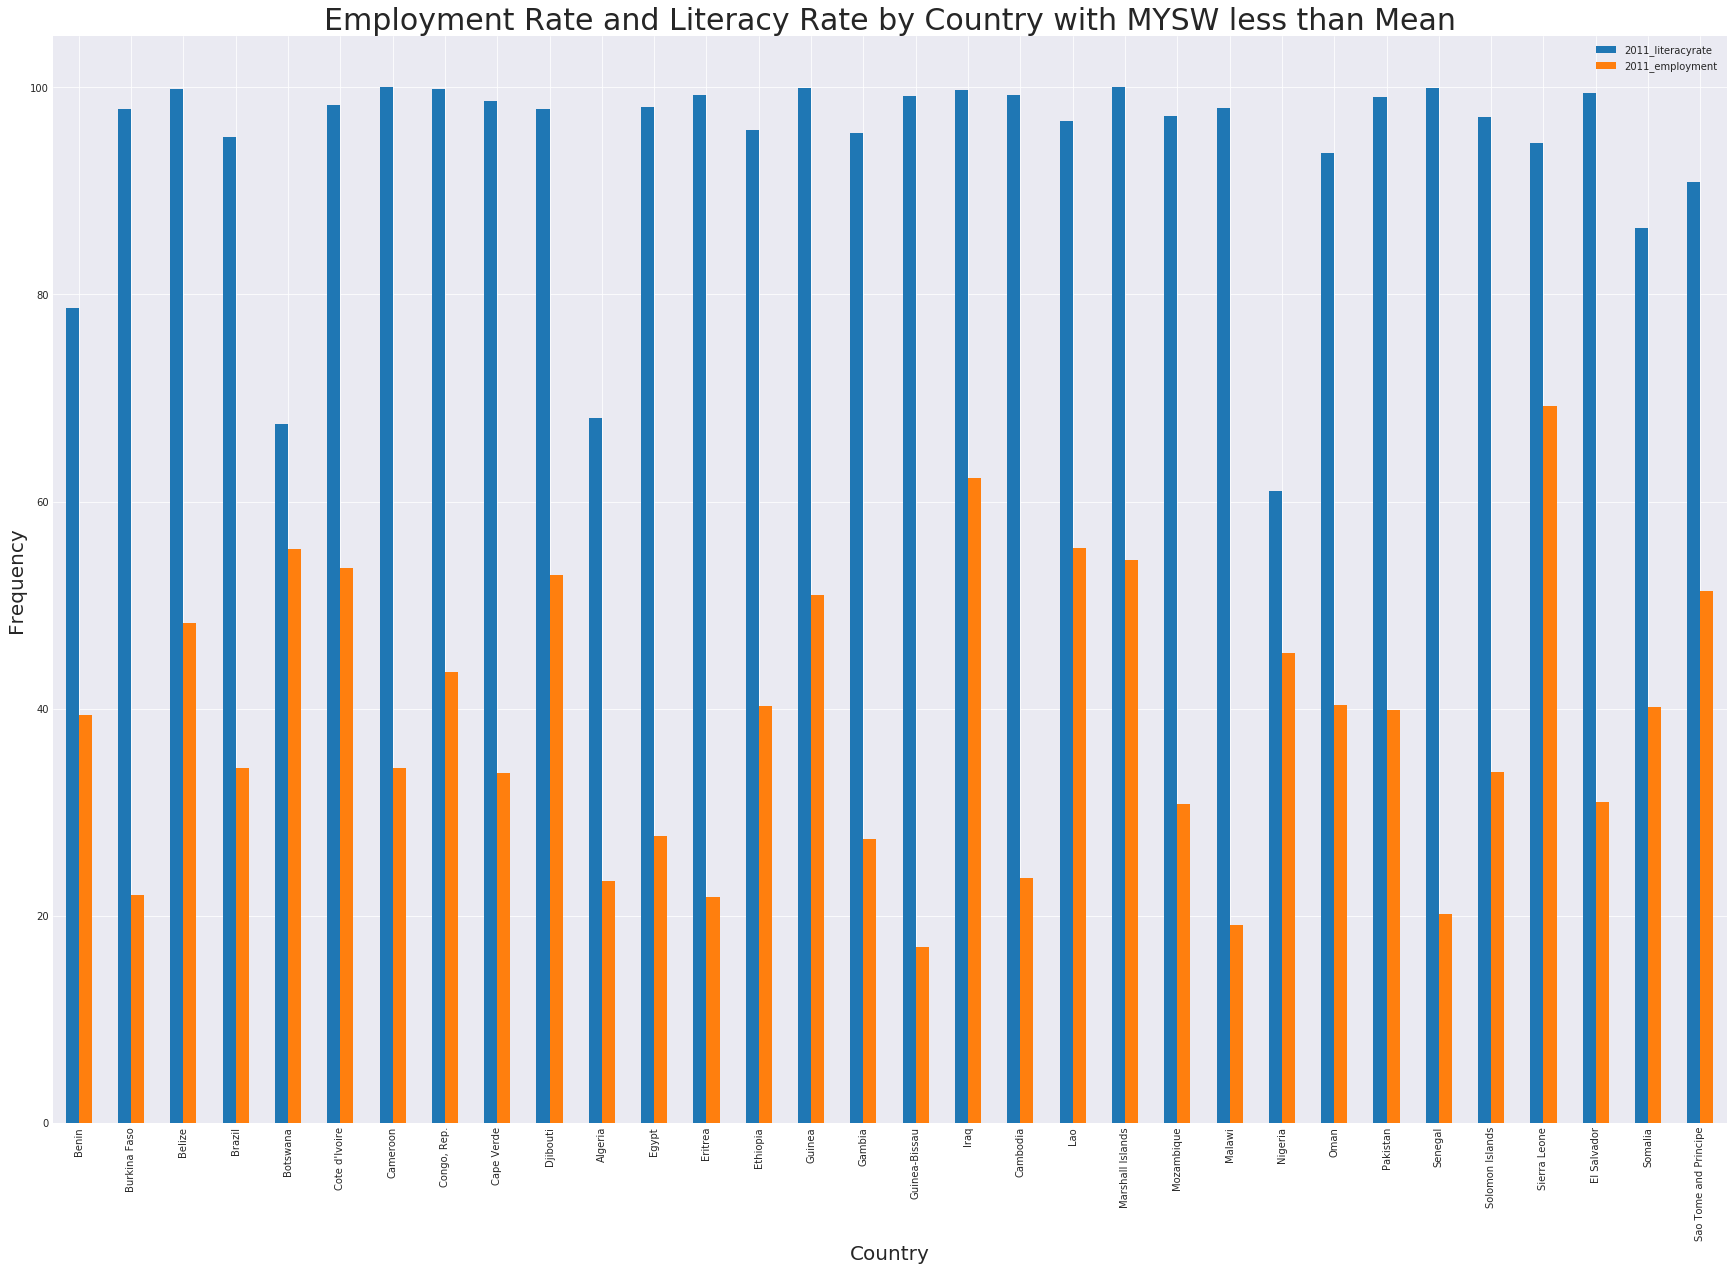

In [40]:
check_MYSW2.plot (x='country', y=['2011_literacyrate','2011_employment'],kind='bar')
plt.title ('Employment Rate and Literacy Rate by Country with MYSW less than Mean', fontsize=30)
plt.xlabel ('Country', fontsize=20)
plt.ylabel ('Frequency',fontsize=20)

At first glance from the bar graphs it can notbe said for certain that countries with average years in school higher than the mean have higher employment and literacy rates.
What can be said is more than half of the  countries with average years in school that are lower than the mean are African.

### Research Question 3: Is  there any correlation between the indicators? 

Text(0,0.5,'Average years in School Women ')

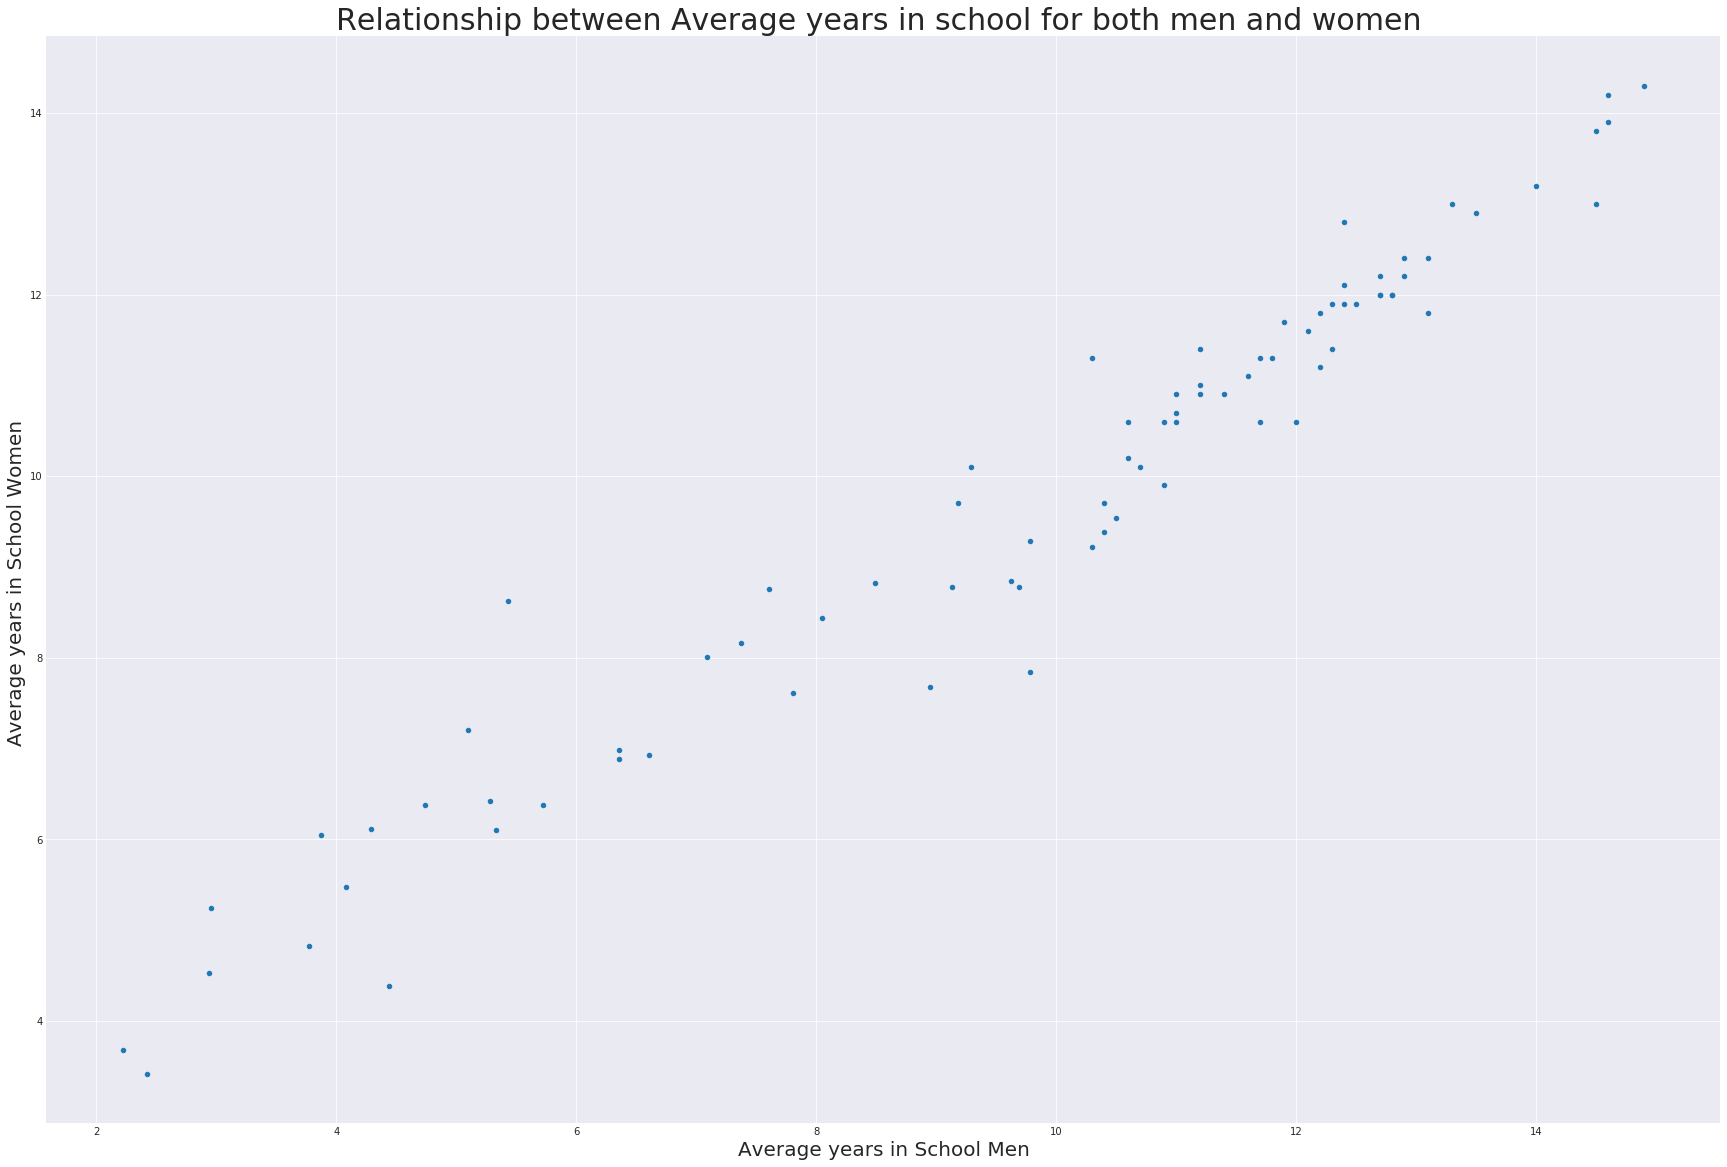

In [41]:
observation_df.plot (x='2011_MYSW', y='2011_MYSM', kind='scatter')
plt.title ('Relationship between Average years in school for both men and women ', fontsize=30)
plt.xlabel ('Average years in School Men', fontsize=20)
plt.ylabel ('Average years in School Women ',fontsize=20)

This scatter plot shows a strong positive correlation between the average years in school of both men and women in the year 2011

Text(0,0.5,'Average years in school Men')

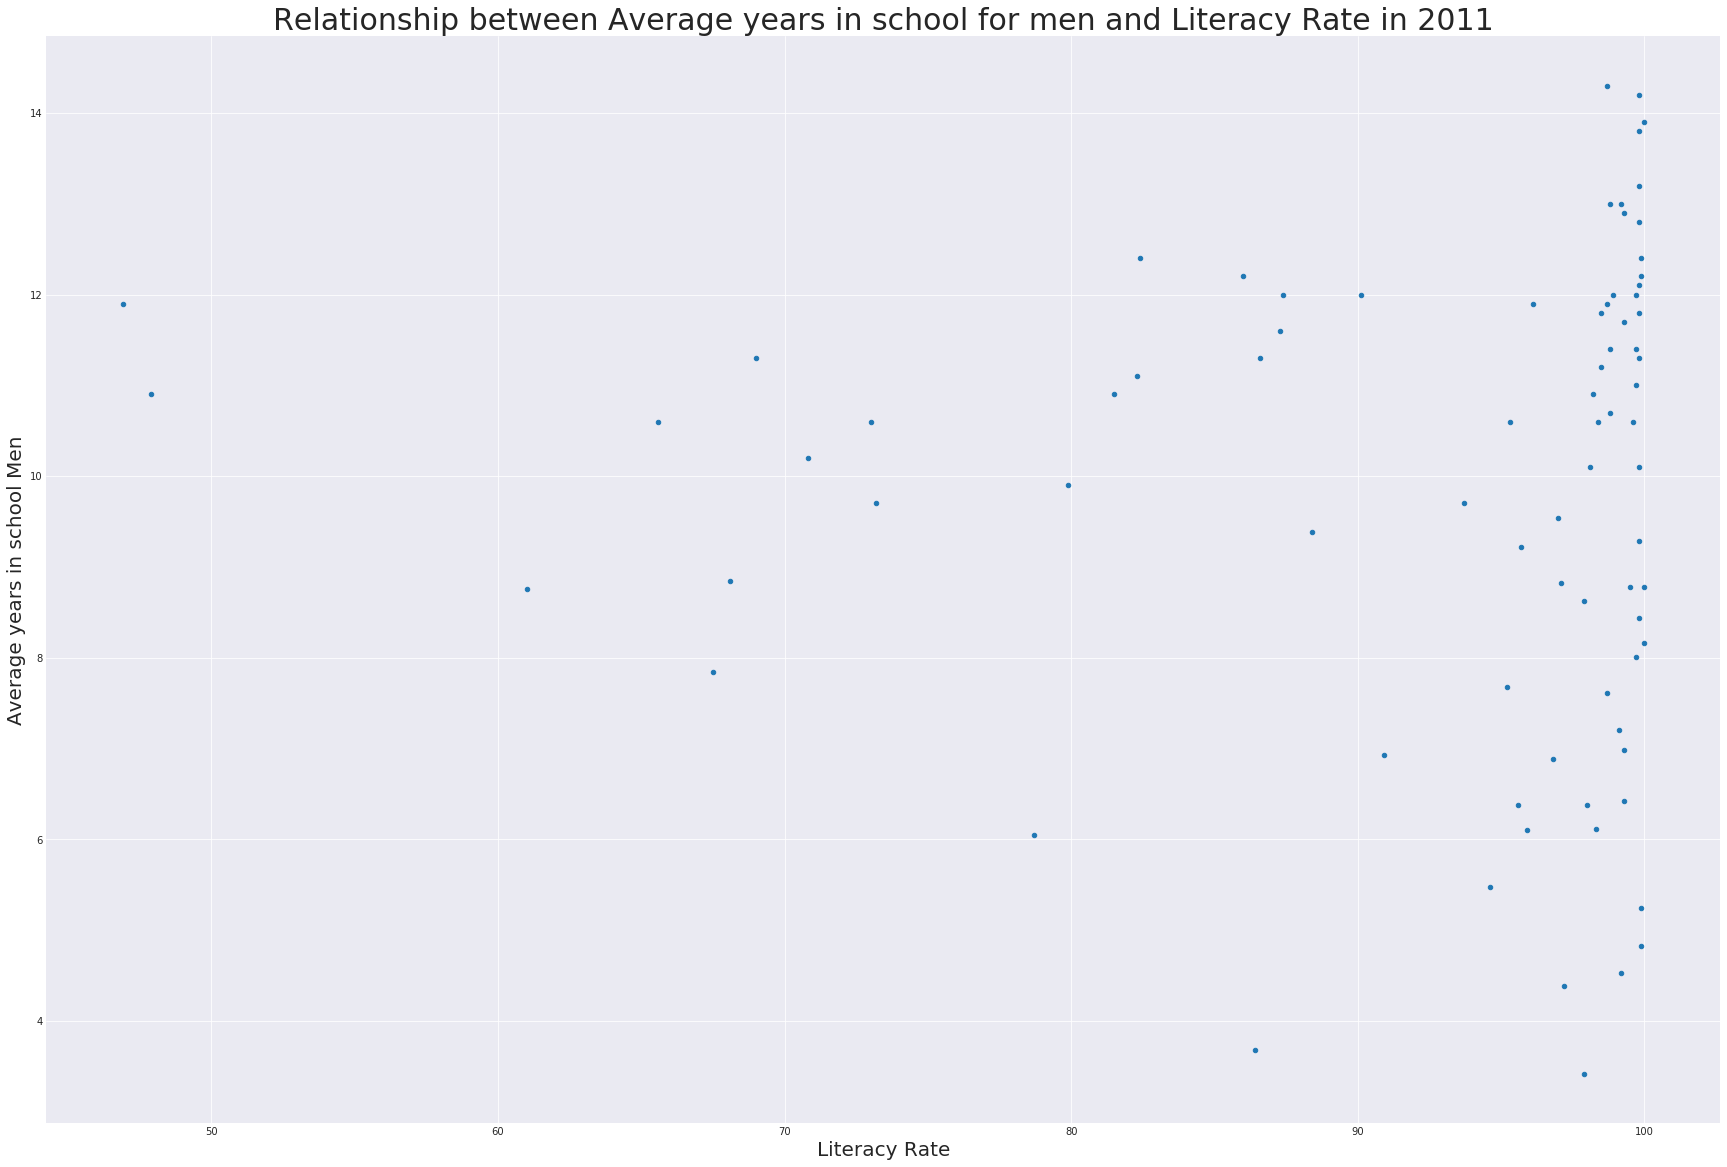

In [42]:
observation_df.plot (x='2011_literacyrate', y='2011_MYSM', kind='scatter')
plt.title ('Relationship between Average years in school for men and Literacy Rate in 2011', fontsize=30)
plt.xlabel ('Literacy Rate', fontsize=20)
plt.ylabel ('Average years in school Men',fontsize=20)

This scatter plot shows a weak negative correlation between Literacy Rate and average years in school in the year 2011

Text(0,0.5,'Average years in School Women')

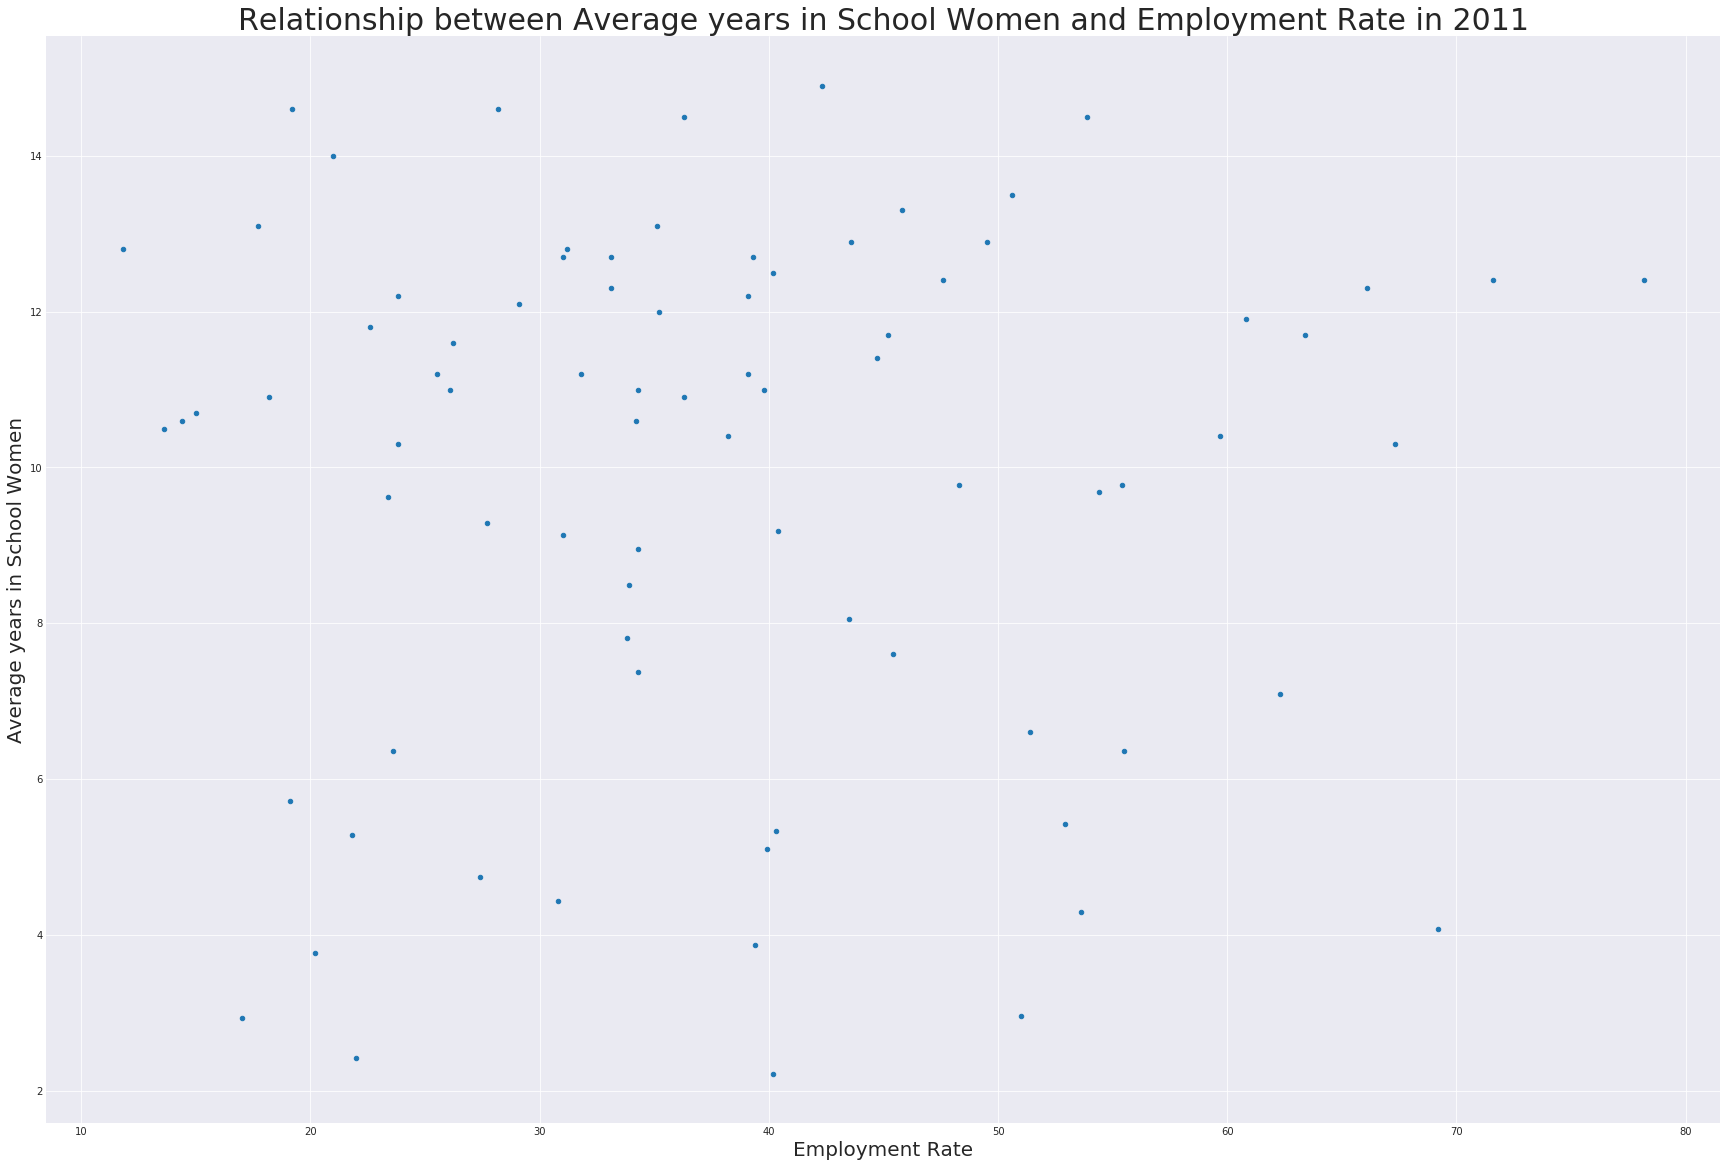

In [43]:
observation_df.plot (x='2011_employment', y='2011_MYSW', kind='scatter')
plt.title ('Relationship between Average years in School Women and Employment Rate in 2011',fontsize =30)
plt.xlabel ('Employment Rate', fontsize=20)
plt.ylabel ('Average years in School Women', fontsize=20)


This scatter plot shows no correlation between Employment rate and average years in school in the year 2011

Text(0,0.5,'Literacy Rate')

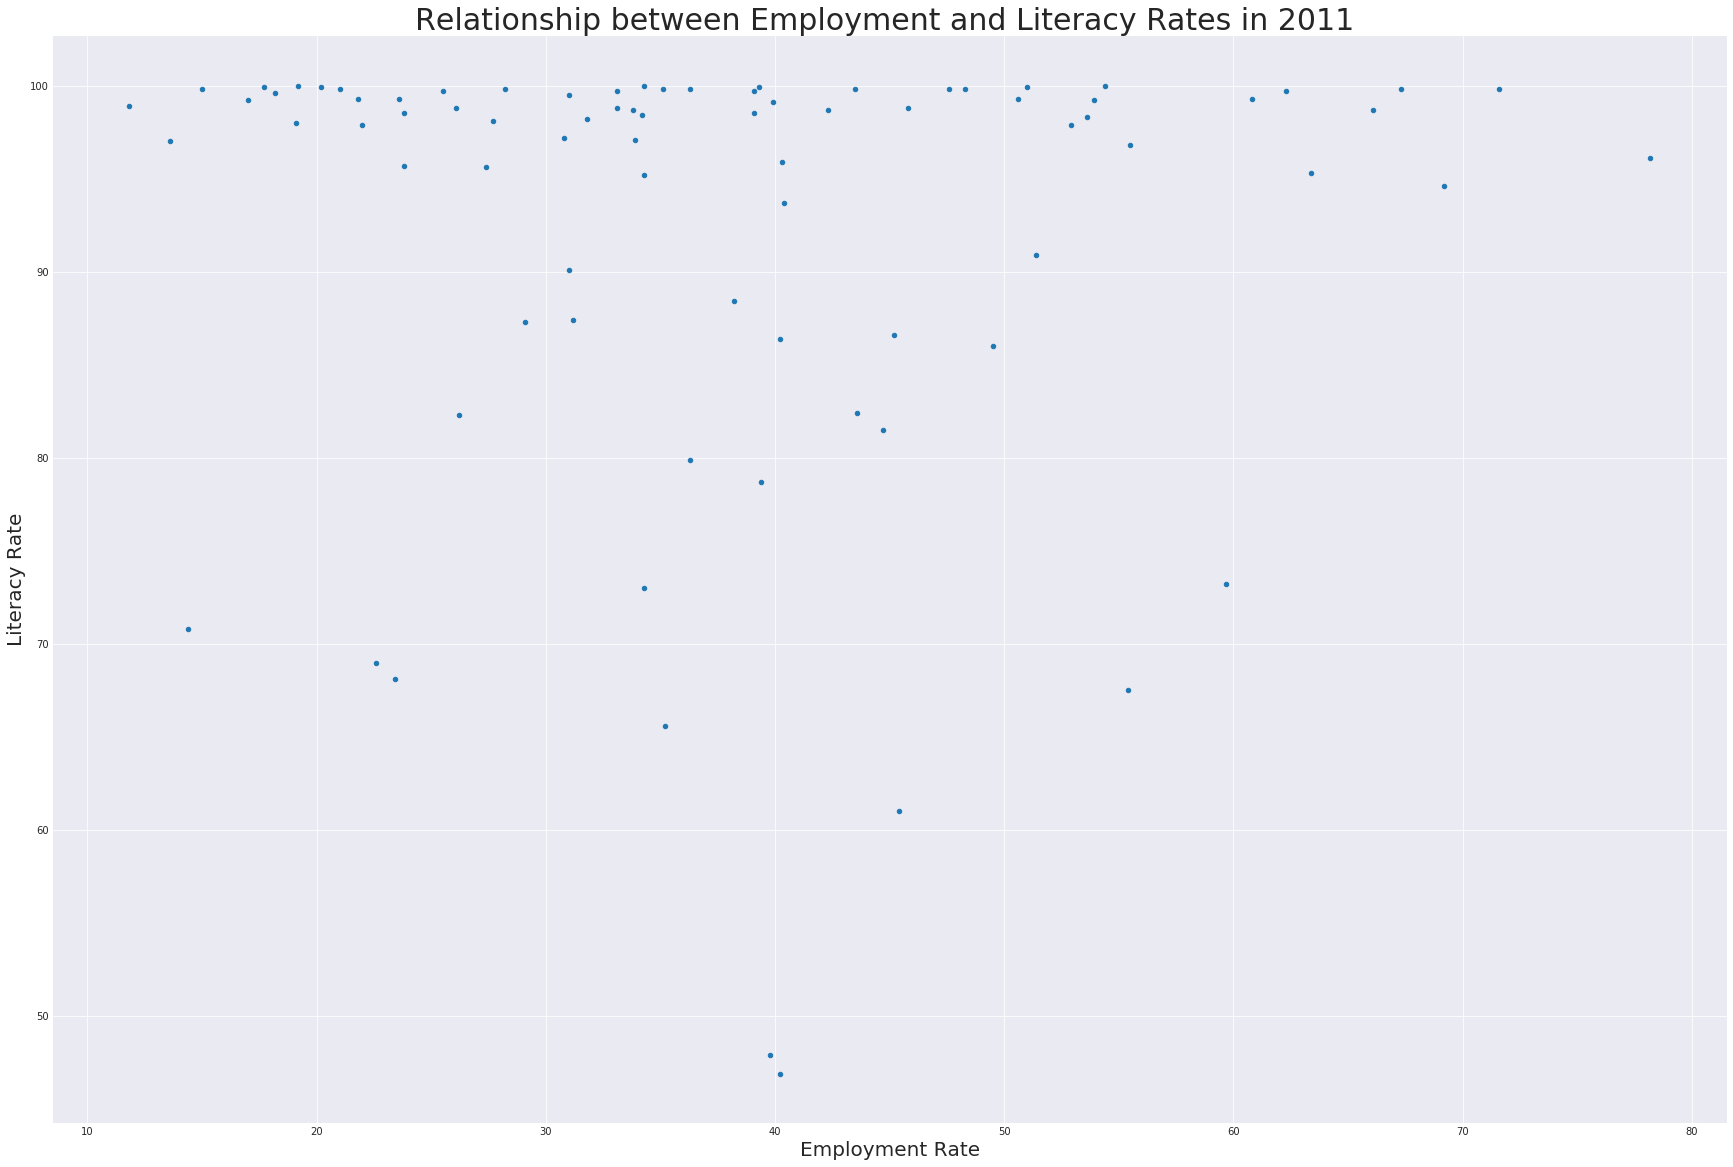

In [44]:
observation_df.plot (x='2011_employment', y='2011_literacyrate', kind='scatter')
plt.title ('Relationship between Employment and Literacy Rates in 2011 ', fontsize=30)
plt.xlabel ('Employment Rate', fontsize=20)
plt.ylabel ('Literacy Rate', fontsize=20)

This scatter plot shows no correlation between employment rate and literacy rate 

In [45]:
observation_df.corr(method='pearson')

,2011_MYSM,2011_MYSW,2011_literacyrate,2011_employment
2011_MYSM,1.000000,0.973226,-0.028026,0.052591
2011_MYSW,0.973226,1.000000,-0.072380,0.006674
2011_literacyrate,-0.028026,-0.072380,1.000000,-0.013278
2011_employment,0.052591,0.006674,-0.013278,1.000000


Using df.corr () to clarify the results of the scatter plots, it shows that:
(1) MYSM and MYSW having a correlation of 0.973226 which is greater         that zero confirms it has a positive correlation

(2) MYSM and Literacy Rate having Pearson's r value of -0.028026 which     is less than zero confirms it has a negative correlation 

(3) MYSW and employment rate having Pearson's r value of 0.006674 which     is greater than zero confirms it has a positive correlation             although very weak as the value is smaller absolute value, making       it difficult to notice any correlation from looking at the scatter     plot

(4)Employment rate and literacy rate having a Pearson's r value of        -0.013278 which is less than zero confirms it has a negative             correlation 


<a id='conclusions'></a>
## Conclusions


In conclusion, for the year 2011, majority of the countries recored had youths between the ages of 15 to 25 in school for average numbers of years that is calculated as more than average, with most of these countries being from other continents other than Africa. Africa being the continent with more countries with average years in school below the calculated mean. Although this did not distinctively reflect  whether the countries with average years in school below the calculated mean have lesser employment rates or literacy rates, this mostly likely can be determined if there was more data on the type of jobs that are available in the various countries (if they required formal education or not for example).
The major limitation was the very parse record of the literacy rate across the years, it would have helped to have this records as it would have helped build a stronger pattern as opposed to only working with the year 2011. Other limitations were not enough indicators such as income, economy, which would have better shared more light on why employment rate and literacy rate would have a negative correlation.





REFERENCES 
Stackoverflow.com
Realpython.com
Tutorialspoint.com
Datatofish.com
Teach Know How(Python-Histograms and skews made easy) YouTube tutorial
7 ways of Handling missing values in machine learning by Satyam Kumar
Pandas.pydata.org
Careerkarma.com
Plot with Pandas:Python Data Visualization for Beginners by Reka Horvath
Numps,Scipy and Pandas:correlation wih Python by Mirko Stojiljković


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert','Project1_Gapminder_World_Investigate_a_Dataset.ipynb'])


0